In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#from tqdm import tqdm_notebook
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [24]:
def split_data(dataframe: pd.DataFrame):
    nrows = int(round(len(dataframe) * 0.75, 0))
    dataframe_train = dataframe.iloc[:nrows, :]
    dataframe_test = dataframe.iloc[nrows:, :]
    assert len(dataframe_train) + len(dataframe_test) == len(dataframe), 'Not the same number of rows!'
    return (dataframe_train, dataframe_test)

In [32]:
def train_predict_plot(train_df: pd.DataFrame, test_df: pd.DataFrame, y: str, order: tuple):
    model = ARIMA(train_df[y], order = order)
    model_fit = model.fit()
    label = f"ARIMA_{order[0]}_{order[1]}_{order[2]}"
    length_test = len(test_df)
    train[label] = model_fit.fittedvalues
    test[label] = model_fit.forecast(length_test+1)
    plt.plot(train_df.index, data_test=data_test, actual=actual,predicted=label)

In [4]:
def adfuller_and_diff(dataframe: pd.DataFrame, y: str):
    result = adfuller(dataframe[y])
    i = 1
    if result[1] > 0.05:
        print('Not stationary!')
        while True:
            dataframe[f'{y}_diff_{i}'] = dataframe[y].diff(periods=i)
            dataframe.dropna(inplace=True)
            result = adfuller(dataframe[f'{y}_diff_{i}'])
            if result[1] > 0.05:
                print('Still not stationary!')
                i += 1
                continue
            else:
                print('Stationary!')
                print(f'ADF: {result[0]}')
                print(f'p-value: {result[1]}')
                break


In [9]:
def plot_pacf_acf(dataframe: pd.DataFrame, y: str):
    plot_pacf(dataframe[y])
    plot_acf(dataframe[y])

In [8]:
adfuller_and_diff(df, 'Close')

Not stationary!
Stationary!
ADF: -10.303522983201983
p-value: 3.324359005581095e-18


In [20]:
df = pd.read_csv("NVDA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [25]:
df_train, df_test = split_data(df)

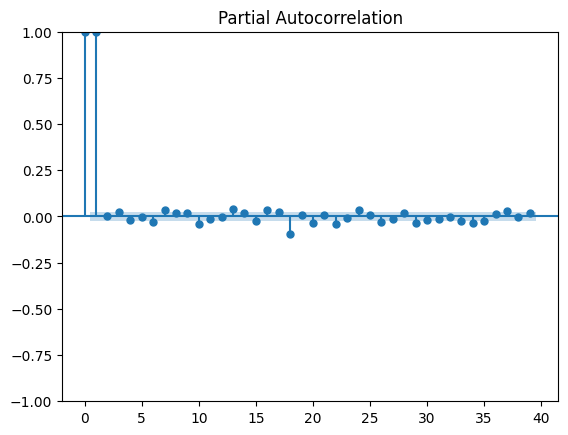

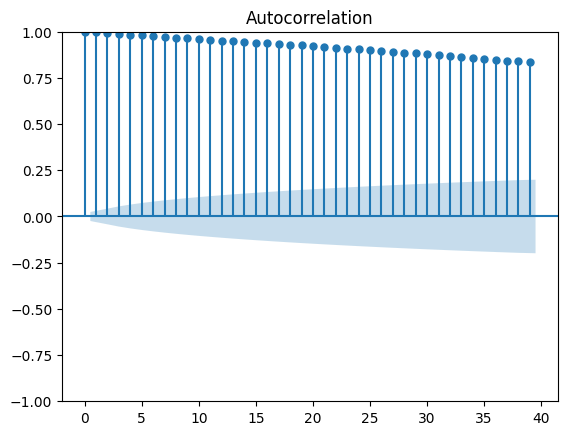

In [11]:
plot_pacf_acf(df, 'Close')

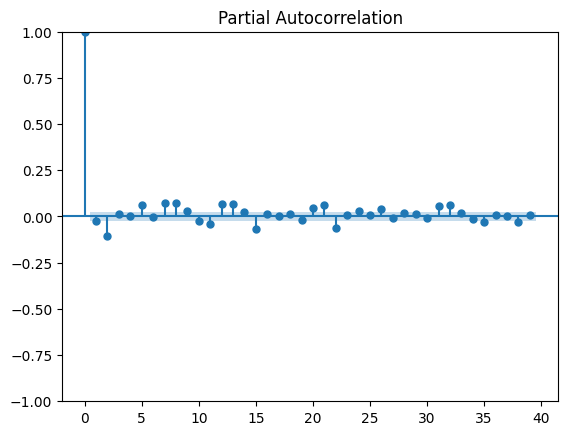

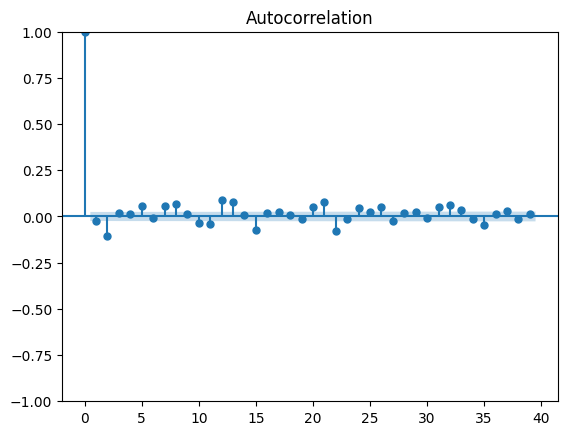

In [10]:
plot_pacf_acf(df, 'Close_diff_1')

In [33]:
train_predict_plot(df_train, df_test, 'Close', (1, 1, 1))

d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Tools\Anaconda\envs\proiect-econ-avans\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


NameError: name 'train' is not defined